In [ ]:
# 1: Import thư viện
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 2: Đọc ảnh PNG chùa (có nền trong suốt)
pagoda = cv2.imread('chua.jpg', cv2.IMREAD_UNCHANGED)

# Nếu ảnh chưa có alpha, tự thêm
if pagoda.shape[2] == 3:
    b, g, r = cv2.split(pagoda)
    alpha = np.ones_like(b) * 255
    pagoda = cv2.merge([b, g, r, alpha])


In [ ]:
# 3: Phóng to ảnh 5×, vẫn giữ size canvas ban đầu
h, w = pagoda.shape[:2]
M = cv2.getRotationMatrix2D((w/2, h/2), 0, 5.0)
pagoda_scaled = cv2.warpAffine(pagoda, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_TRANSPARENT)


In [ ]:
# 4: Áp dụng hiệu ứng warping (uốn cong)
# Ví dụ: uốn cong theo hàm sin theo chiều dọc
def warp_sin(img, amplitude=30, freq=2):
    h, w = img.shape[:2]
    map_x = np.tile(np.arange(w), (h,1)).astype(np.float32)
    map_y = np.tile(np.arange(h), (w,1)).T.astype(np.float32)
    map_x += amplitude * np.sin(2 * np.pi * map_y * freq / h)
    return cv2.remap(img, map_x, map_y, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_TRANSPARENT)

pagoda_warped = warp_sin(pagoda_scaled, amplitude=30, freq=2)


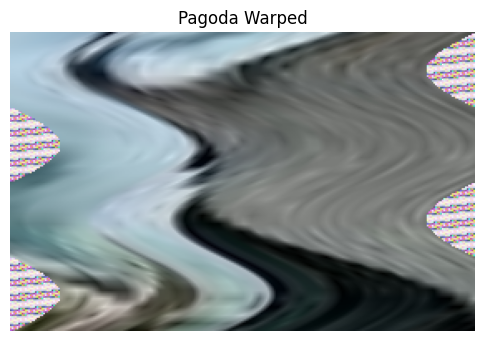

True

In [ ]:
# 5: Hiển thị ảnh trong notebook
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(pagoda_warped, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.title("Pagoda Warped")
plt.show()
cv2.imwrite('pagoda_warped.jpg', pagoda_warped[:,:,0:3])
